In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2
from tqdm import tqdm

np.random.seed(69)

Below Code defines a Business class, which simulates an individual business. The business can be of different sizes (small, medium, large) and operate in different sectors (Banking & Finance, Technology, FMCG, Healthcare). Each business has attributes such as its size, sector, budget, number of employees, wage expenditure, income, and a flag indicating whether the business is bankrupt. The class includes various methods to model business operations, such as paying wages, generating income, firing or hiring employees, and updating the budget

In [45]:
class Business:
    sector_wage_history = {}
    size_wage_history = {}
    
    def __init__(self, size, sector, budget):
        self.size = size # Defines the size of the business (small, medium, large)
        self.sector = sector # Defines the sector of the business (e.g. 'Banking & Finance', 'Technology', 'FMCG', 'Healthcare')
        self.budget = budget # Defines the starting budget of the business
        self.wage_expenditure = 0 # Initializes wage expenditure to 0
        self.income = 0 # Initializes income to 0
        self.is_bankrupt = False # Flag to check if the business is bankrupt, initialized to False
        self.wage_history = []

        # Determines the starting number of employees based on the size of the business
        if self.size == 'small':
            self.starting_employees = int(np.abs(np.random.normal(70, 5)))
        elif self.size == 'medium':
            self.starting_employees = int(np.abs(np.random.normal(600, 50)))
        elif self.size == 'large':
            self.starting_employees = int(np.abs(np.random.normal(6500, 500)))
            
        self.employees = self.starting_employees # Sets the current number of employees equal to the starting number of employees
        
    def pay_wages(self, min_wage_base, cpi, property_index):
        wage_distribution = np.random.pareto(4, self.employees) + 1 # Creates a Pareto distribution for wages
        
        # Different base wages for different sectors
        if self.sector == 'Banking & Finance':
            min_wage_base *= 1.3 * np.random.normal(1.02, 0.03)
        elif self.sector == 'Technology':
            min_wage_base *= 1.2 * np.random.normal(1.02, 0.03)
        elif self.sector == 'FMCG':
            min_wage_base *= 1.1 * np.random.normal(1.02, 0.01)
        elif self.sector == 'Healthcare':
            min_wage_base *= 1.15 * np.random.normal(1.02, 0.01)

        # Calculates the total wages by multiplying the minimum base wage by the wage distribution, cpi, and property index
        wages = min_wage_base * wage_distribution * cpi * property_index
        self.wage_expenditure = np.sum(wages) # Calculates the total wage expenditure by summing all the wages
        self.wage_history.append(self.wage_expenditure)

        if self.sector not in Business.sector_wage_history:
            Business.sector_wage_history[self.sector] = []
        
        Business.sector_wage_history[self.sector].append(self.wage_expenditure)

        if self.size not in Business.size_wage_history:
            Business.size_wage_history[self.size] = []
        Business.size_wage_history[self.size].append(self.wage_expenditure)

    def generate_income(self):
        # Sets the income based on the sector and size of the business
        if self.sector == 'Banking & Finance':
            if self.size == 'small':
                self.income = np.random.normal(10000000, 100000)
            elif self.size == 'medium':
                self.income = np.random.normal(30000000, 500000)
            else:
                self.income = np.random.normal(70000000, 1000000)
                
        elif self.sector == 'Technology':
            if self.size == 'small':
                self.income = np.random.normal(10000000, 100000)
            elif self.size == 'medium':
                self.income = np.random.normal(30000000, 500000)
            else:
                self.income = np.random.normal(70000000, 1000000)
                
        elif self.sector == 'FMCG':
            if self.size == 'small':
                self.income = np.random.normal(10000000, 100000)
            elif self.size == 'medium':
                self.income = np.random.normal(30000000, 500000)
            else:
                self.income = np.random.normal(70000000, 1000000)
                
        elif self.sector == 'Healthcare':
            if self.size == 'small':
                self.income = np.random.normal(10000000, 100000)
            elif self.size == 'medium':
                self.income = np.random.normal(30000000, 500000)
            else:
                self.income = np.random.normal(70000000, 1000000)
    
    def adjust_income(self, avg_sector_income):
        # Adjust income based on average income in the sector
        self.income += 0.05 * avg_sector_income # Increases the income by 10% of the average income in the sector
    
    def fire_employees(self, previous_budget):
        if self.size == 'small':
            max_iter = int(0.1 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees
        elif self.size == 'medium':
            max_iter = int(0.2 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees
        elif self.size == 'large':
            max_iter = int(0.3 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees

        iter_count = 0 # Initializes the iteration count
        while self.budget - self.wage_expenditure <= 0.20 * previous_budget and self.employees > 0: # Runs the loop as long as the available budget is less than 50% of the previous budget and there are employees to fire
            if iter_count < max_iter: # If the iteration count is less than the maximum limit
                self.employees -= 1 # Reduces the number of employees by 1
                self.update_wage_expenditure() # Updates the wage expenditure
                iter_count += 1 # Increments the iteration count
            else:
                break # Breaks the loop if the maximum limit of iterations is reached

    def hire_employees(self, previous_budget):
        if self.size == 'small':
            max_iter = int(0.01 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees
        elif self.size == 'medium':
            max_iter = int(0.1 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees
        elif self.size == 'large':
            max_iter = int(0.3 * self.starting_employees)  # Maximum number of iterations based on the starting number of employees

        iter_count = 0 # Initializes the iteration count
        while self.budget - self.wage_expenditure > 1.6 * previous_budget: # Runs the loop as long as the available budget exceeds 160% of the previous budget
            if iter_count < max_iter:  # If the iteration count is less than the maximum limit
                self.employees += 1 # Increase the number of employees by 1
                self.update_wage_expenditure() # Updates the wage expenditure
                if self.budget <= 1.4 * previous_budget: # Runs the loop as long as the available budget exceeds 130% of the previous budget
                    break
                iter_count += 1 # Increments the iteration count
            else:
                break # Breaks the loop if the maximum limit of iterations is reached

    def update_wage_expenditure(self):
        wage_distribution = 1 + np.random.pareto(4, self.employees)
        wages = sector_min_wage[self.sector] * wage_distribution # Calculates the wages by multiplying the minimum sector wage by the wage distribution
        self.wage_expenditure = np.sum(wages) # Calculates the total wage expenditure by summing all the wages

    def profit(self):
        if self.size == 'small':
            return 0.8 * self.income - self.wage_expenditure  # Returns the profit by subtracting the wage expenditure from the income
        elif self.size == 'medium':
            return 0.6 * self.income - self.wage_expenditure  # Returns the profit by subtracting the wage expenditure from the income
        elif self.size == 'large':
            return 0.4 * self.income - self.wage_expenditure  # Returns the profit by    
    
    def move_employees_within_sector(self, avg_sector_wages, avg_profits_per_sector, BUSINESSES): 
        if self.wage_expenditure / self.employees < avg_sector_wages[self.sector]: # If the average wage expenditure per employee is less than the average wage in the sector
            num_moving = int(0.2 * self.employees * (avg_sector_wages[self.sector] - self.wage_expenditure / self.employees) / avg_sector_wages[self.sector]) # Calculates the number of employees moving to another business
            self.employees -= num_moving # Reduces the number of employees by the number of employees moving
            for business in BUSINESSES: # For each business in the same sector
                if business.sector == self.sector and business.profit() > self.profit() and business != self: # If the business makes more profit and is not the current business
                    business.employees += num_moving # If the business makes more profit and is not the current business
                    break # Breaks the loop

    def update_budget(self, avg_profits, avg_sector_wages, avg_sector_income, BUSINESSES):
        previous_budget = self.budget # Saves the current budget for reference
        self.budget += 0.6 * self.profit() # Updates the budget by adding the profit


        if self.budget <= 0 or self.employees <= 0: # If the budget or the number of employees drops to zero or below
            self.is_bankrupt = True  # Marks the business as bankrupt

        elif self.budget <= 0.9 * previous_budget: # If the budget falls to 90% of the previous budget or lower
            self.fire_employees(previous_budget) # Fires employees

        elif self.budget > 1.8 * previous_budget: # If the budget rises to 140% of the previous budget or higher
            self.hire_employees(previous_budget) # Hires employees
        
        if avg_profits[self.sector] < np.mean(list(avg_profits.values())): # If the average profit in the sector is less than the average profit across all sectors
            num_leaving = int(0.1* self.employees * (np.mean(list(avg_profits.values())) - avg_profits[self.sector]) / np.mean(list(avg_profits.values()))) # Calculates the number of employees leaving for other sectors
            self.employees -= num_leaving # Calculates the number of employees leaving for other sectors
            for sector, avg_profit in avg_profits.items(): # For each sector
                if sector != self.sector: # If the sector is not the current sector
                    num_joining = int(num_leaving * (avg_profit / np.sum([v for k, v in avg_profits.items() if k != self.sector]))) # Calculates the number of employees joining from other sectors
                    BUSINESSES.append(create_business(self.size, sector, num_employees=num_joining)) # Creates new businesses in the sector with the number of employees joining
    
    def bankruptcy(self):
        # If a business goes bankrupt, return the size and budget for a new business
        return self.size, self.budget # Returns the size and budget of the business

pay_wages(): calculates the wage expenditure of a business based on the sector, size, consumer price index (cpi), and property index.

generate_income(): generates income for a business depending on its sector and size.

adjust_income(): adjusts the income of a business based on the average income in its sector.

fire_employees(): reduces the number of employees if the business budget goes below a certain level.

hire_employees(): hires more employees if the business budget is above a certain level.

update_wage_expenditure(): updates the total wage expenditure of a business.

profit(): calculates the profit of a business (income minus wage expenditure).

move_employees_within_sector(): simulates movement of employees within a sector based on average wages and profit.

update_budget(): updates the budget of a business based on its profit, the average profit in the sector, average wages, and average sector income.

bankruptcy(): simulates a business going bankrupt.

In [46]:

def create_business(size=None, sector=None, budget=None, num_employees=None):
    # If size is not provided, choose randomly from the predefined SIZES
    if not size:
        size = np.random.choice(SIZES)
    # If sector is not provided, choose randomly from the predefined SECTORS
    if not sector:
        sector = np.random.choice(SECTORS)
    
    # Define budget for small, medium, and large businesses with normal distribution
    if size == 'small':
        budget = np.random.normal(10000000, 1000000)
    elif size == 'medium':
        budget = np.random.normal(50000000, 5000000)
    elif size == 'large':
        budget = np.random.normal(100000000, 10000000)
    
    # Instantiate a new business object with the specified parameters
    business = Business(size, sector, budget)
     # If num_employees is provided, set the employees of the business to num_employees
    if num_employees is not None:
        business.employees = num_employees
    # Return the newly created business object
    return business

# Define business sectors
SECTORS = ['Banking & Finance', 'Technology', 'FMCG', 'Healthcare']
# Define business sizes
SIZES = ['small', 'medium', 'large']
# Define business sizes
sector_min_wage = {
    'Banking & Finance': 3200,
    'Technology': 3500,
    'FMCG': 2700,
    'Healthcare': 3000
}  ## Defining the minimum wage

months = 120 # number of months for which we simulate the model
num_simulations = 100 # Number of simulation made


cpi = 1  # Set the Consumer Price Index (CPI). It's a measure that examines the weighted average of prices of a basket of consumer goods and services.
property_index = 1  # Set the property index. It could be a measure that reflects the prices of property.
sigma = 0.1 # Set the standard deviation of the normal distribution used in the model

lambda_ = 1.0  # Jump intensity
a = -0.2  # Expected jump size
b = 0.2  # Jump size volatility
dt = 1 # Set the standard deviation of the normal distribution used in the model
mu=0.1 # Set the mean return for the geometric Brownian motion used in the model

Below Code creates a Simulation class to model a collection of businesses over a specific period (in months) and for a number of simulations. During each simulation, each business pays wages, generates income, and adjusts its budget accordingly. This class also models economic factors like the Consumer Price Index (CPI) and property index, which are influenced by random jumps (using a Poisson process) and stochastic variables (dW1_t, dW2_t). It runs the simulation for the defined number of simulations and months. During each month of each simulation, each business pays wages, generates income, adjusts its budget, and may move employees or go bankrupt based on their profits and the average sector income.

In [47]:
# Simulation class simulates the economic model for businesses
class Simulation:
    # Initialization of the simulation
    def __init__(self, num_simulations, months):
        self.num_simulations = num_simulations 
        self.months = months
        self.profits_over_time_sims = [] # Store profits over time for each simulation
        self.profits_over_time_size_sims = [] # Store profits over time per size for each simulation
        self.cpi_simulations = [] # Store Consumer Price Index (CPI) for each simulation
        self.property_index_simulations = [] # Store property index for each simulation
        self.employees_over_time_sims = []
        self.employees_over_time_size_sims = []

     # Run the simulation    
    def run(self):
         # Loop over all simulations
        for sim in tqdm(range(self.num_simulations)):
            # Create 100 businesses for each simulation
            BUSINESSES = [create_business() for _ in range(100)]
             # Initialize various simulation-specific variables
            profits_over_time = {sector: [] for sector in SECTORS}
            profits_over_time_size = {sector: {size: [] for size in SIZES} for sector in SECTORS}
            avg_sector_wages = {sector: 0 for sector in SECTORS}
            num_employees_sector = {sector: 0 for sector in SECTORS}
            cpi = 1
            property_index = 1
            cpi_sim = [cpi]
            property_index_sim = [property_index]
            avg_profits_per_sector = {sector: 0 for sector in SECTORS}
            employees_over_time = {sector: [] for sector in SECTORS}
            employees_over_time_size = {sector: {size: [] for size in SIZES} for sector in SECTORS}
            num_employees_sector = {sector: 0 for sector in SECTORS}
            num_employees_sector_size = {sector: {size: 0 for size in SIZES} for sector in SECTORS}
             # Initialize various simulation-specific variables
            for month in range(self.months):
                 # Initialize various simulation-specific variables
                monthly_profits = {sector: [] for sector in SECTORS}
                monthly_profits_size = {sector: {size: [] for size in SIZES} for sector in SECTORS}
                avg_sector_income = {sector: 0 for sector in SECTORS}
                num_businesses_sector = {sector: 0 for sector in SECTORS}
                # Compute random variables for the jump diffusion process
                N_t = np.random.poisson(lambda_ * dt)
                dW1_t = np.random.randn()
                dW2_t = np.random.randn()
                 # Compute the new values for CPI and property index using the jump diffusion model
                cpi *= np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW1_t + a * N_t + b * np.sqrt(N_t) * dW2_t)
                property_index *= np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW2_t + a * N_t + b * np.sqrt(N_t) * dW2_t)
                # Store CPI and property index values for this month
                cpi_sim.append(cpi)
                property_index_sim.append(property_index)
                # Loop over all businesses
                for i, business in enumerate(BUSINESSES):
                    # Pay wages, generate income, and compute profit
                    business.pay_wages(sector_min_wage[business.sector], cpi, property_index)
                    business.generate_income()
                    monthly_profits[business.sector].append(business.profit())
                    monthly_profits_size[business.sector][business.size].append(business.profit())
                    avg_sector_income[business.sector] += business.income
                    num_businesses_sector[business.sector] += 1
                    avg_sector_wages[business.sector] += business.wage_expenditure
                    num_employees_sector[business.sector] += business.employees
                    # If a business goes bankrupt, replace it
                    if business.is_bankrupt:
                        max_profit_sector = max(avg_sector_income, key=avg_sector_income.get)
                        size, budget = business.bankruptcy()
                        if business.size == 'large':
                            BUSINESSES[i] = create_business(size='medium', sector=business.sector)
                        else:
                            BUSINESSES[i] = create_business(business.size, business.sector)
                # Update budget, adjust income, pay wages, move employees for each business
                for business in BUSINESSES:
                    business.update_budget(avg_profits_per_sector, avg_sector_wages, avg_sector_income, BUSINESSES)
                    business.adjust_income(avg_sector_income[business.sector])
                    business.pay_wages(sector_min_wage[business.sector], cpi, property_index)
                    business.move_employees_within_sector(avg_sector_wages, avg_profits_per_sector, BUSINESSES)
                    num_employees_sector[business.sector] += business.employees
                    num_employees_sector_size[business.sector][business.size] += business.employees
                # Compute average wages and income per sector
                # sector_wages = {sector: [] for sector in SECTORS}
                # size_wages = {size: [] for size in SIZES}
                for sector in SECTORS:
                    employees_over_time[sector].append(num_employees_sector[sector])
                    # if sector in Business.sector_wage_history:
                        # sector_wages[sector] = Business.sector_wage_history[sector]
                    if num_employees_sector[sector] != 0:
                        avg_sector_wages[sector] /= num_employees_sector[sector]
                    
                    if num_businesses_sector[sector] != 0:
                        avg_sector_income[sector] /= num_businesses_sector[sector]
                    else:
                        avg_profits_per_sector[sector] = 0
                    # Compute and store average profits
                    if monthly_profits[sector]:
                        profits_over_time[sector].append(np.mean(monthly_profits[sector]))
                        for size in SIZES:
                            profits_over_time_size[sector][size].append(np.mean(monthly_profits_size[sector][size]))
                            employees_over_time_size[sector][size].append(num_employees_sector_size[sector][size])
                    else:
                        profits_over_time[sector].append(None)
                        for size in SIZES:
                            profits_over_time_size[sector][size].append(None)
                            # if size in Business.size_wage_history:
                                # size_wages[size] = Business.size_wage_history[size]
            # Store profits and CPI, property index data for this simulation
            self.profits_over_time_sims.append(profits_over_time)
            self.profits_over_time_size_sims.append(profits_over_time_size)
            self.cpi_simulations.append(cpi_sim)
            self.property_index_simulations.append(property_index_sim)
            self.employees_over_time_sims.append(employees_over_time)
            self.employees_over_time_size_sims.append(employees_over_time_size)
            

After running all simulations, it calculates the average profit over time for each sector and each business size within those sectors. It then plots these results, showing how profits change over time for different sectors and business sizes. It creates one 2D plot for each sector and one 2D plot for each size, as well as a 3D plot showing how profits change over time for different business sizes within each sector.

In [48]:
simulation = Simulation(num_simulations, months)

# Run the simulation
simulation.run()

# Retrieve the simulation results
profits_over_time_avg = {sector: [np.nanmean([simulation.profits_over_time_sims[sim][sector][month] for sim in range(num_simulations)]) for month in range(months)] for sector in SECTORS}
profits_over_time_size_avg = {sector: {size: [np.nanmean([simulation.profits_over_time_size_sims[sim][sector][size][month] for sim in range(num_simulations)]) for month in range(months)] for size in SIZES} for sector in SECTORS}

employees_over_time_avg = {sector: [np.nanmean([simulation.employees_over_time_sims[sim][sector][month] for sim in range(num_simulations)]) for month in range(months)] for sector in SECTORS}
employees_over_time_size_avg = {sector: {size: [np.nanmean([simulation.employees_over_time_size_sims[sim][sector][size][month] for sim in range(num_simulations)]) for month in range(months)] for size in SIZES} for sector in SECTORS}

  0%|          | 0/100 [00:00<?, ?it/s]

 17%|█▋        | 17/100 [00:56<03:07,  2.25s/it]C:\Users\asus\AppData\Local\Temp\ipykernel_7028\3613518812.py:139: RuntimeWarning: invalid value encountered in scalar divide
  if self.wage_expenditure / self.employees < avg_sector_wages[self.sector]: # If the average wage expenditure per employee is less than the average wage in the sector
100%|██████████| 100/100 [04:51<00:00,  2.92s/it]


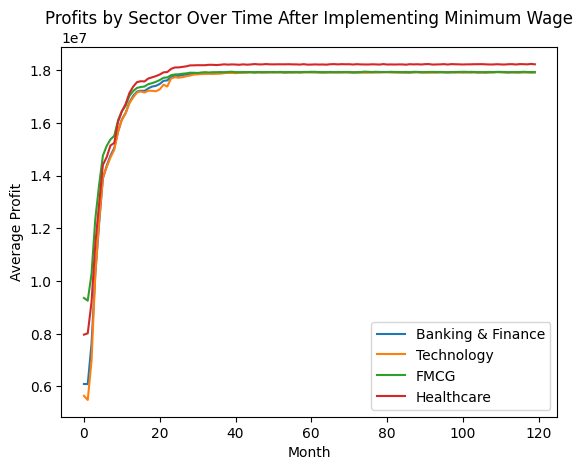

In [55]:
for sector in SECTORS:
    plt.plot(range(months), profits_over_time_avg[sector], label=sector)

plt.title('Profits by Sector Over Time After Implementing Minimum Wage')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.legend()
plt.show()

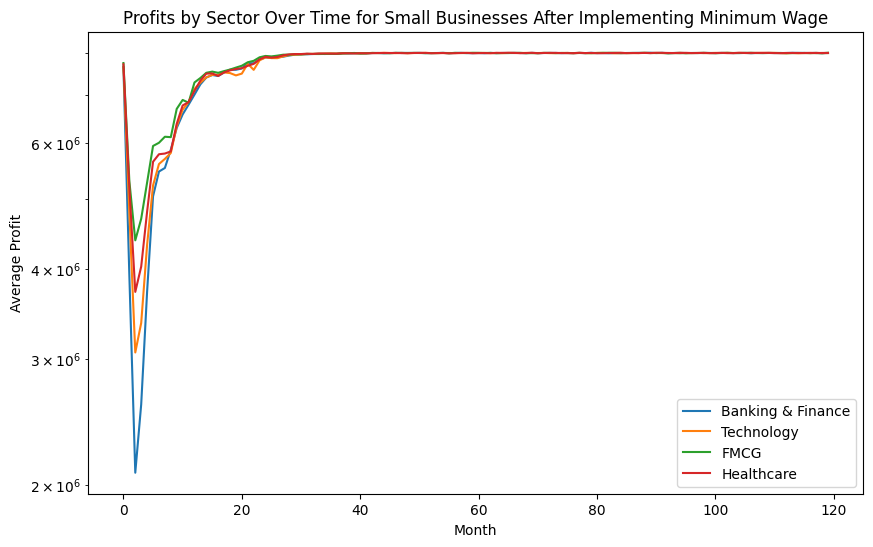

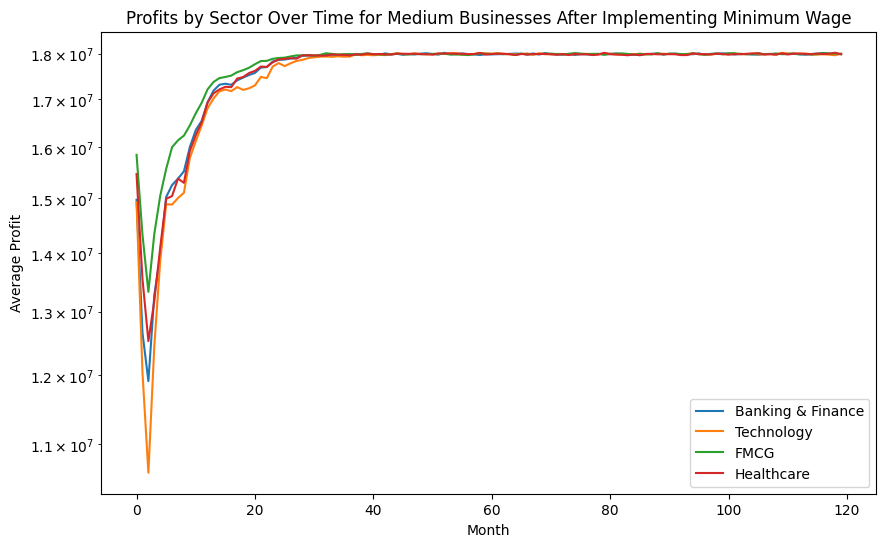

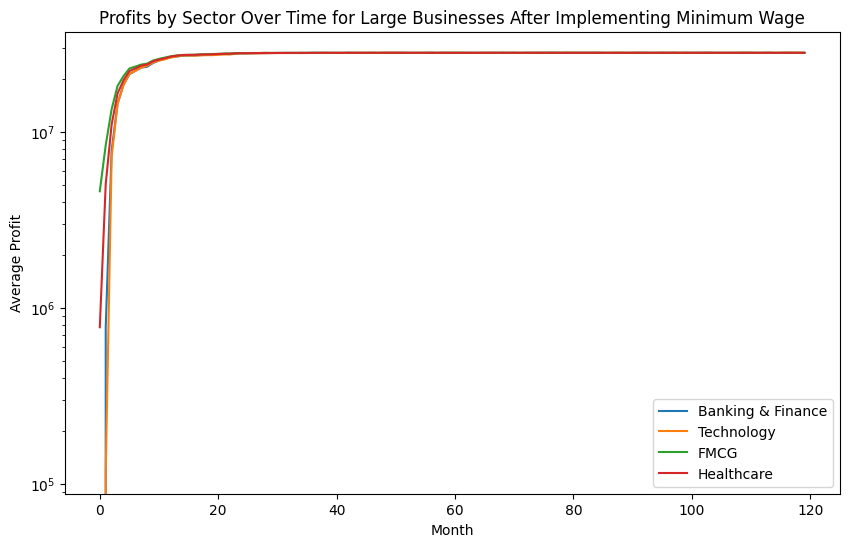

In [56]:
for size in SIZES:
    plt.figure(figsize=(10, 6))  # Create a new figure for each size
    for sector in SECTORS:
        plt.plot(range(months), profits_over_time_size_avg[sector][size], label=sector)
    plt.title(f'Profits by Sector Over Time for {size.capitalize()} Businesses After Implementing Minimum Wage')
    plt.xlabel('Month')
    plt.ylabel('Average Profit')
    plt.yscale('log')
    plt.legend()
    plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_7028\705830814.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


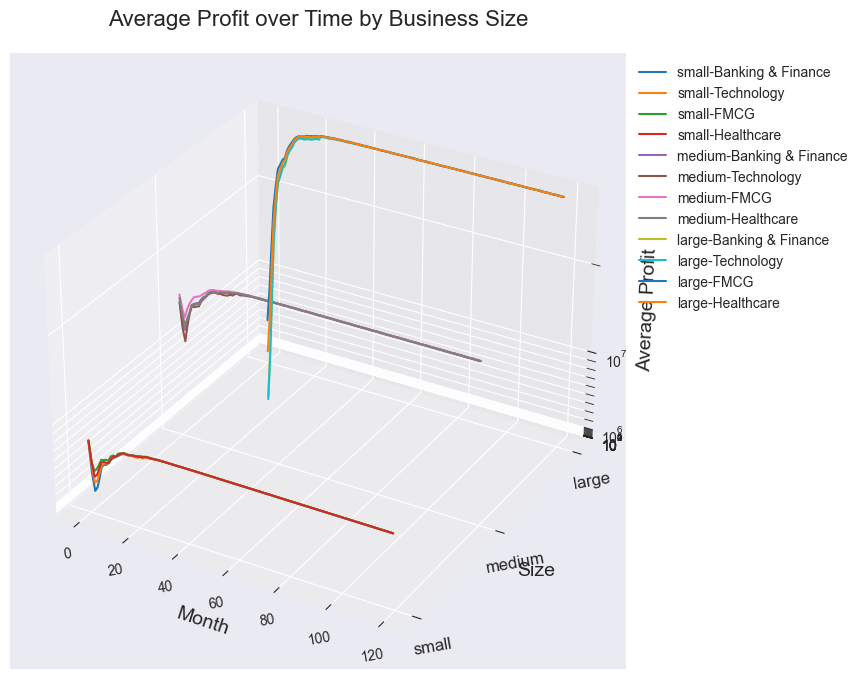

In [64]:
plt.style.use('seaborn-darkgrid')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = list(range(months))
for size_idx, size in enumerate(SIZES):
    for sector_idx, sector in enumerate(SECTORS):
        y = [size_idx] * months
        z = profits_over_time_size_avg[sector][size]
        ax.plot(x, y, z, label=f'{size}-{sector}')

# Set Labels with larger font size
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Size', fontsize=14)
ax.set_zlabel('Average Profit', fontsize=14)

# Set Ticks with larger font size
ax.set_yticks(range(len(SIZES)))
ax.set_yticklabels(SIZES, fontsize=12)

# Rotate x and y tick labels for better visibility
ax.tick_params(axis='x', labelrotation=10)
ax.tick_params(axis='y', labelrotation=10)

# Add a title to the graph
ax.set_title('Average Profit over Time by Business Size', fontsize=16, pad=20)

# Display legend outside the plot at specific position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Use logarithmic scale for z-axis
ax.set_zscale('log')

# Display the graph
plt.show()

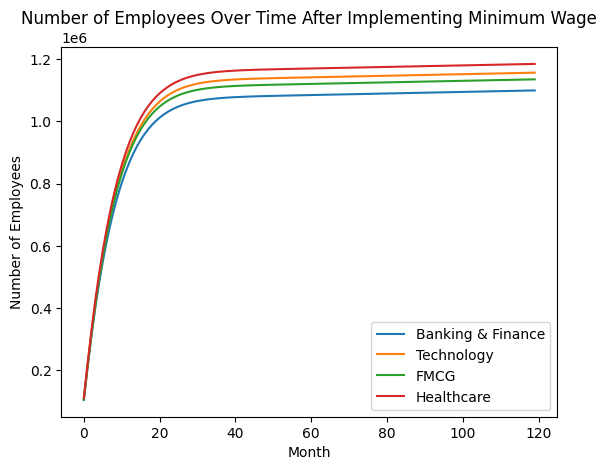

In [58]:
for sector in SECTORS:
    plt.plot(range(months), employees_over_time_avg[sector], label=sector)

plt.title('Number of Employees Over Time After Implementing Minimum Wage')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

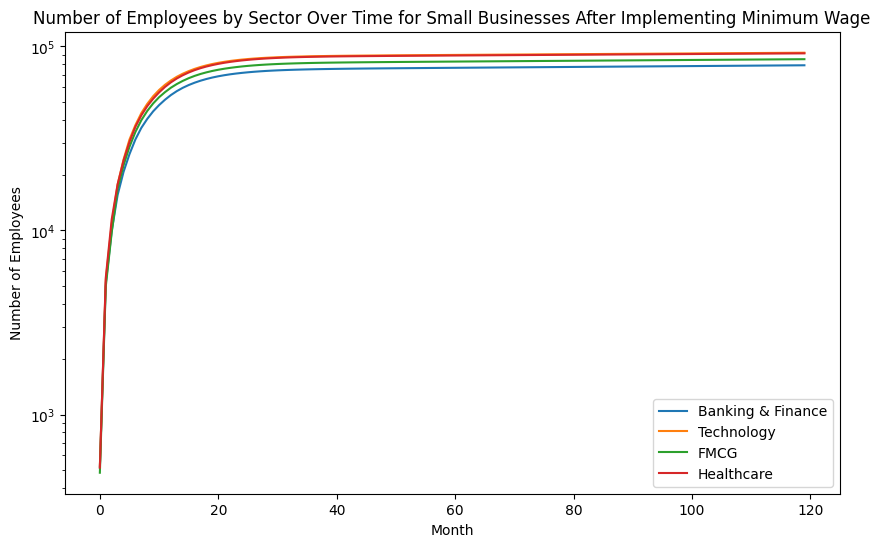

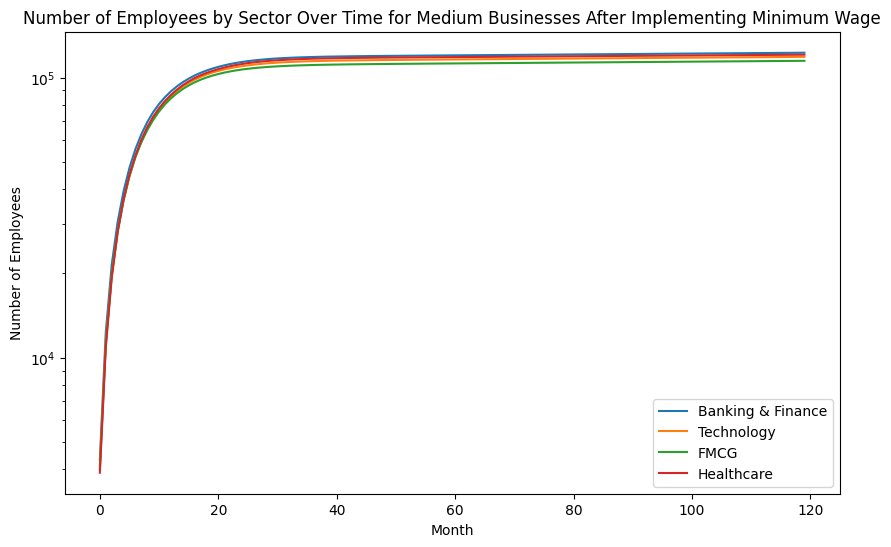

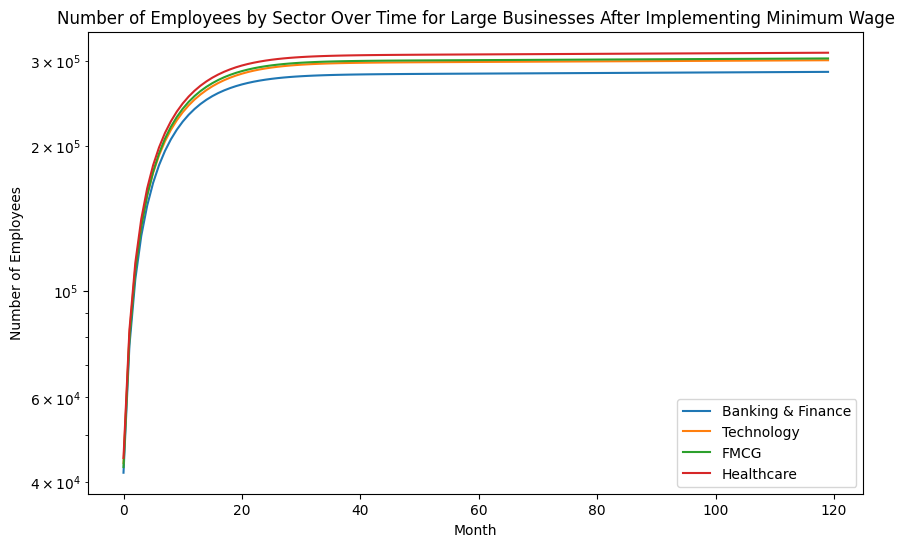

In [59]:
for size in SIZES:
    plt.figure(figsize=(10, 6))  # Create a new figure for each size
    for sector in SECTORS:
        plt.plot(range(months), employees_over_time_size_avg[sector][size], label=sector)
    plt.title(f'Number of Employees by Sector Over Time for {size.capitalize()} Businesses After Implementing Minimum Wage')
    plt.xlabel('Month')
    plt.ylabel('Number of Employees')
    plt.yscale('log')
    plt.legend()
    plt.show()